In [1]:
# ИУ5-65Б СОРОКИН АРТЕМ Вариант 9



import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, roc_curve, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt

#models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.metrics import confusion_matrix
import seaborn as sns




In [2]:
data = pd.read_csv('houses_to_rent.csv')

In [3]:
# Изменение настроек вывода
pd.set_option('display.max_rows', None)  # Отображение всех строк
pd.set_option('display.max_columns', None)  # Отображение всех столбцов
print (data)

      Unnamed: 0  city   area  rooms  bathroom  parking spaces floor  \
0              0     1    240      3         3               4     -   
1              1     0     64      2         1               1    10   
2              2     1    443      5         5               4     3   
3              3     1     73      2         2               1    12   
4              4     1     19      1         1               0     -   
5              5     1     13      1         1               0     2   
6              6     1     55      1         1               1     2   
7              7     1     55      2         2               1     2   
8              8     1     82      3         1               1     3   
9              9     1     32      1         1               1    16   
10            10     0     60      1         1               0     6   
11            11     0     64      1         2               1     4   
12            12     1     20      1         1               0  

In [4]:
print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      6080 non-null   int64 
 1   city            6080 non-null   int64 
 2   area            6080 non-null   int64 
 3   rooms           6080 non-null   int64 
 4   bathroom        6080 non-null   int64 
 5   parking spaces  6080 non-null   int64 
 6   floor           6080 non-null   object
 7   animal          6080 non-null   object
 8   furniture       6080 non-null   object
 9   hoa             6080 non-null   object
 10  rent amount     6080 non-null   object
 11  property tax    6080 non-null   object
 12  fire insurance  6080 non-null   object
 13  total           6080 non-null   object
dtypes: int64(6), object(8)
memory usage: 665.1+ KB
None


In [5]:
#Удалим дублирующийся столбец нумерации записей
data = data.drop(data.columns[0], axis=1)

##### Очистка данных 

Преобразование категориальных признаков в «0» и «1».

Заполнение пропущенных значений.

Удаление всех лишних символов и запятых.

Покрытие всех столбцов целыми числами.

In [6]:
data['animal'] = data['animal'].replace(to_replace='acept', value=1)
data['animal'] = data['animal'].replace(to_replace='not acept', value=0)

data['furniture'] = data['furniture'].replace(to_replace='furnished', value=1)
data['furniture'] = data['furniture'].replace(to_replace='not furnished', value=0)


In [7]:
data['floor'] = data['floor'].replace(to_replace='-', value=1)

In [8]:
for col in ['hoa', 'rent amount', 'property tax', 'fire insurance', 'total']:
    data[col] = data[col].str.replace('R\$', '', regex=True)
    data[col] = data[col].str.replace(',', '', regex=True)

In [9]:
def replace_string_with_zero(value):
    if isinstance(value, str) and not value.isdigit():
        return 0
    else:
        return value

In [10]:
data = data.applymap(replace_string_with_zero)
data = data.astype('int64')

In [11]:
data

city   area  rooms  bathroom  parking spaces  floor  animal  furniture  \
0        1    240      3         3               4      1       1          1   
1        0     64      2         1               1     10       1          0   
2        1    443      5         5               4      3       1          1   
3        1     73      2         2               1     12       1          0   
4        1     19      1         1               0      1       0          0   
5        1     13      1         1               0      2       1          0   
6        1     55      1         1               1      2       1          1   
7        1     55      2         2               1      2       1          0   
8        1     82      3         1               1      3       1          1   
9        1     32      1         1               1     16       1          0   
10       0     60      1         1               0      6       1          0   
11       0     64      1         2               1      4       1          1   
12       1     20      1         1               0      4       1          1   
13       1    375      4         5               5      1       1          0   
14       1     92      2         1               1      7       0          1   
15       0     56      2         1               1      1       1          0   
16       0    188      2         3               8      1       1          0   
17       1    100      3         2               1      1       1          0   
18       1    192      3         3               2     13       1          0   
19       1     93      3         2               1     10       1          0   
20       1    155      3         3               2      1       1          0   
21       1     80      2         2               0      9       0          0   
22       1     65      2         2               2     14       0          0   
23       1    320      3         3               4      1       1          0   
24       1    180      3         5               3      3       1          0   
25       1     31      1         1               1      4       1          0   
26       1    105      4         2               2      3       1          0   
27       1    300      3         4               2      9       1          1   
28       0    150      3         2               2     13       1          0   
29       1    130      3         3               2      1       1          0   
30       1     70      2         1               0      1       1          0   
31       1    120      3         1               4      1       1          0   
32       1    250      3         4               2      1       1          0   
33       1     50      1         1               0      1       1          0   
34       1    240      3         3               3      3       1          0   
35       1    250      4         4               2      1       0          0   
36       0     94      3         3               2      1       1          0   
37       1    176      3         4               3      4       1          0   
38       1    180      3         4               5      1       1          0   
39       1    191      3         3               4      1       1          1   
40       1     25      1         1               0     14       1          0   
41       1    800      4         5               4      9       1          0   
42       1    340      3         4               3      1       1          1   
43       1     90      2         1               0      1       0          0   
44       0    650      5         4               8      1       1          1   
45       1    100      2         2               0      1       1          0   
46       1    230      4         4               4      1       1          1   
47       1    190      2         3               2      1       1          0   
48       1    205      4         4               6      5       1          0   
49    

In [12]:
y = data['city']
X = data.drop('city', axis=1)

In [13]:
data.drop_duplicates(inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5879 entries, 0 to 6079
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   city            5879 non-null   int64
 1   area            5879 non-null   int64
 2   rooms           5879 non-null   int64
 3   bathroom        5879 non-null   int64
 4   parking spaces  5879 non-null   int64
 5   floor           5879 non-null   int64
 6   animal          5879 non-null   int64
 7   furniture       5879 non-null   int64
 8   hoa             5879 non-null   int64
 9   rent amount     5879 non-null   int64
 10  property tax    5879 non-null   int64
 11  fire insurance  5879 non-null   int64
 12  total           5879 non-null   int64
dtypes: int64(13)
memory usage: 643.0 KB


##### Конец очистки данных

##### Нормализация датасета

In [15]:
scaler = MinMaxScaler()
scaler.fit(X)
scaled_X = scaler.transform(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, train_size=0.8)

In [17]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
print("Logistic Model: ", f1_score(log_pred, y_test)*100)

Logistic Model:  94.12276882890727


In [18]:
# # визуализировать предсказания
# plt.plot(y_test.values.reshape(-1)[:1], label='true')
# plt.plot(log_pred.reshape(-1)[:1], label='predicted')
# plt.legend()
# plt.show()

# # Визуализация предсказаний
# plt.scatter(range(len(log_pred)), log_pred, label='Predicted')
# # Визуализация действительных значений
# plt.scatter(range(len(y_test)), y_test, label='Actual')
# plt.xlabel('Sample')
# plt.ylabel('Value')
# plt.title('Logistic Regression: Predicted vs Actual')
# plt.legend()
# plt.show()

# # Визуализация предсказаний
# plt.plot(range(len(log_pred)), log_pred, label='Predicted')
# # Визуализация действительных значений
# plt.plot(range(len(y_test)), y_test, label='Actual')
# plt.xlabel('Sample')
# plt.ylabel('Value')
# plt.title('Random Forest: Predicted vs Actual')
# plt.legend()
# plt.show()


# # Вычисление матрицы ошибок
# cm = confusion_matrix(y_test, log_pred)

# # Визуализация матрицы ошибок
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, cmap='Blues')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()

In [19]:
# Метрика f1_score
from sklearn.svm import SVC
svm=SVC(kernel='rbf')
svm.fit(X_train,y_train)
print(svm.score(X_test,y_test))


0.8889802631578947


AUC-ROC: 0.5


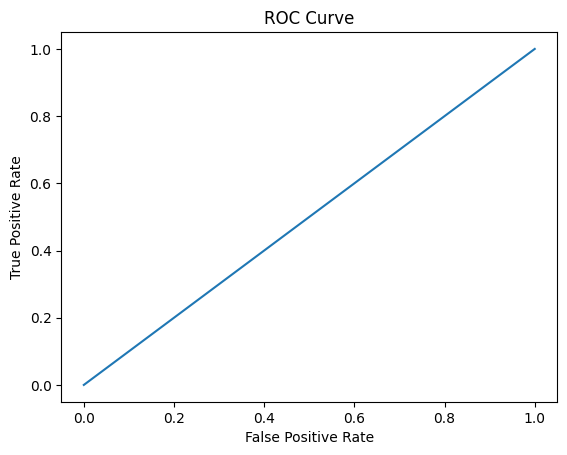

In [20]:
# Получение предсказаний модели на тестовом наборе
svm_pred = svm.predict(X_test)


# Вычисление значений для ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, svm_pred)

# Построение ROC-кривой
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# Вычисление площади под ROC-кривой
auc = roc_auc_score(y_test, svm_pred)
print('AUC-ROC:', auc)

# Вывод ROC-кривой и метрики AUC-ROC
plt.show()

In [21]:
# Подсчет числа истинно положительных (True Positive) и ложно отрицательных (False Negative) предсказаний
# Метрика полноты
tp = sum((y_test == 1) & (svm_pred == 1))
fn = sum((y_test == 1) & (svm_pred == 0))
    
# Вычисление полноты
recall = tp / (tp + fn)
print (recall)

1.0


##### Градиентный бустинг

In [22]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

In [23]:
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [24]:
grad_pred = model.predict(X_test)

In [25]:
accuracy = accuracy_score(y_test, grad_pred)
auc_roc = roc_auc_score(y_test, grad_pred)
print("Accuracy:", accuracy)
print("AUC-ROC:", auc_roc)

Accuracy: 0.915296052631579
AUC-ROC: 0.6833418987905575


AUC-ROC: 0.6833418987905575


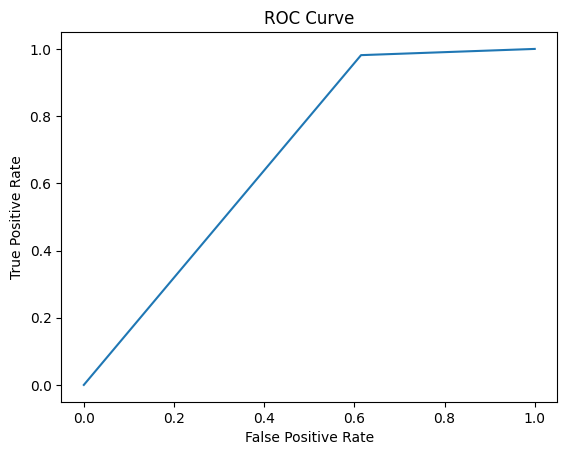

In [26]:
# Вычисление значений для ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, grad_pred)

# Построение ROC-кривой
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# Вычисление площади под ROC-кривой
auc = roc_auc_score(y_test, grad_pred)
print('AUC-ROC:', auc)

# Вывод ROC-кривой и метрики AUC-ROC
plt.show()

In [27]:
# Подсчет числа истинно положительных (True Positive) и ложно отрицательных (False Negative) предсказаний
# Метрика полноты
tp = sum((y_test == 1) & (grad_pred == 1))
fn = sum((y_test == 1) & (grad_pred == 0))
    
# Вычисление полноты
recall = tp / (tp + fn)
print (recall)

0.9814986123959297
